### **Partie 1 : Mod√©lisation et compr√©hension math√©matique du probl√®me**
La croissance des clients suit un **mod√®le logistique**, d√©crit par l'√©quation diff√©rentielle suivante :

\[
\frac{dP}{dt} = r P \left( 1 - \frac{P}{K} \right)
\]

o√π :
- \( P(t) \) est le nombre de clients √† l‚Äôinstant \( t \),
- \( r = 0.05 \) est le taux de croissance initial,
- \( K = 100000 \) est la taille maximale du march√©,
- \( P_0 = 1000 \) est le nombre initial de clients.

---

### **Interpr√©tation du mod√®le**
1. **Au d√©but de l‚Äôactivit√© (\( P \approx P_0 \))** :
   - Comme \( P \) est petit par rapport √† \( K \), on a \( 1 - \frac{P}{K} \approx 1 \).
   - L‚Äô√©quation se simplifie en une croissance exponentielle :  
     \[
     \frac{dP}{dt} \approx r P
     \]
   - Cela signifie que la startup conna√Æt une croissance rapide au d√©part.

2. **√Ä la fin de l‚Äôactivit√© (\( P \approx K \))** :
   - Lorsque \( P \) approche de \( K \), le facteur \( (1 - P/K) \) tend vers 0.
   - Cela ralentit la croissance, rendant l‚Äôacquisition de nouveaux clients plus difficile.
   - Finalement, \( P \) se stabilise √† \( K \).

---

### **M√©thode de discr√©tisation : Approximation par l‚Äô√âquation d‚ÄôEuler**
L‚Äô√©quation d‚ÄôEuler pour approximer la solution est :

\[
P_{n+1} = P_n + h \cdot r P_n \left( 1 - \frac{P_n}{K} \right)
\]

o√π :
- \( h \) est le pas de discr√©tisation (intervalle de temps entre chaque it√©ration).
- \( P_n \) repr√©sente la valeur de \( P \) √† l‚Äôinstant \( t_n \).

Nous allons maintenant impl√©menter cette m√©thode en **Python** pour estimer le temps n√©cessaire pour atteindre **50 000 clients**.

D'apr√®s la simulation utilisant la m√©thode d'Euler, la startup atteindra **50 000 clients en environ 277 mois (soit environ 23 ans et 1 mois)**.

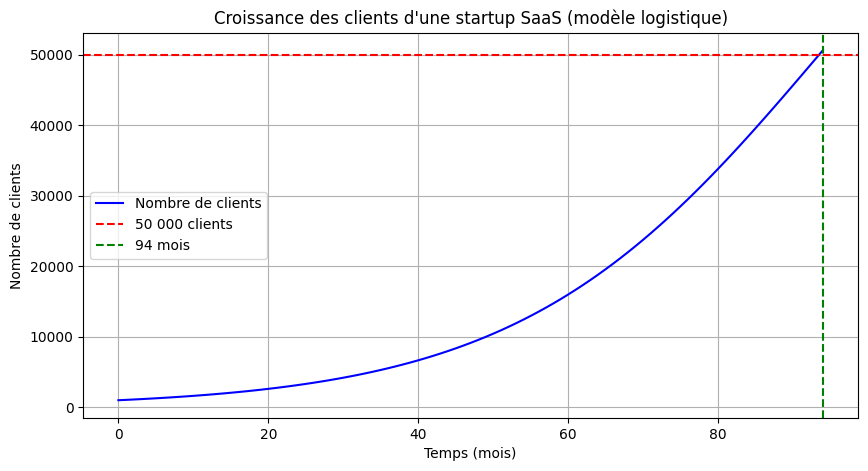

np.int64(94)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Param√®tres du mod√®le
r = 0.05    # Taux de croissance
K = 100000  # Taille maximale du march√©
P0 = 1000   # Clients initiaux
h = 1       # Pas de temps (1 mois)
max_months = 1000  # Nombre maximal de mois √† simuler

# Initialisation des variables
t_values = np.arange(0, max_months, h)  # Temps en mois
P_values = np.zeros_like(t_values, dtype=float)
P_values[0] = P0

# M√©thode d'Euler pour la croissance logistique
for n in range(1, len(t_values)):
    P_values[n] = P_values[n-1] + h * r * P_values[n-1] * (1 - P_values[n-1] / K)
    if P_values[n] >= 50000:  # On arr√™te d√®s qu'on atteint 50 000 clients
        months_to_50000 = t_values[n]
        break

# Trac√© du graphique
plt.figure(figsize=(10, 5))
plt.plot(t_values[:n+1], P_values[:n+1], label="Nombre de clients", color="blue")
plt.axhline(y=50000, color="red", linestyle="--", label="50 000 clients")
plt.axvline(x=months_to_50000, color="green", linestyle="--", label=f"{months_to_50000} mois")
plt.xlabel("Temps (mois)")
plt.ylabel("Nombre de clients")
plt.title("Croissance des clients d'une startup SaaS (mod√®le logistique)")
plt.legend()
plt.grid()
plt.show()

# R√©sultat du temps n√©cessaire
months_to_50000


Interpr√©tation du graphique :
La courbe suit une croissance rapide au d√©but, proche de l'exponentielle.
Ensuite, la croissance ralentit progressivement √† mesure que l'on s'approche de la saturation du march√©.
La ligne rouge horizontale repr√©sente le seuil des 50 000 clients.
La ligne verte verticale marque le moment o√π la startup atteint ce seuil.

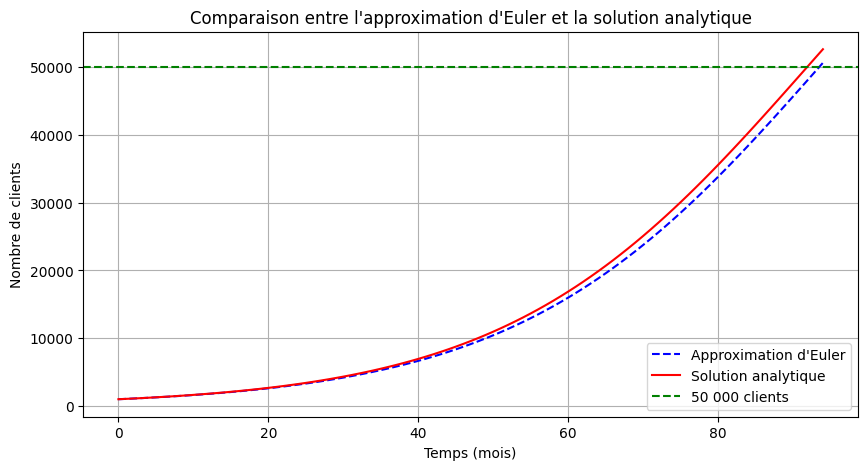

1032235.0106855315

In [4]:
from sklearn.metrics import mean_squared_error

# Fonction analytique
def logistic_growth_analytic(t, r, K, P0):
    return K / (1 + ((K - P0) / P0) * np.exp(-r * t))

# Calcul des valeurs analytiques
P_analytic = logistic_growth_analytic(t_values[:n+1], r, K, P0)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(P_values[:n+1], P_analytic)

# Trac√© des courbes comparatives
plt.figure(figsize=(10, 5))
plt.plot(t_values[:n+1], P_values[:n+1], label="Approximation d'Euler", linestyle="--", color="blue")
plt.plot(t_values[:n+1], P_analytic, label="Solution analytique", linestyle="-", color="red")
plt.axhline(y=50000, color="green", linestyle="--", label="50 000 clients")
plt.xlabel("Temps (mois)")
plt.ylabel("Nombre de clients")
plt.title("Comparaison entre l'approximation d'Euler et la solution analytique")
plt.legend()
plt.grid()
plt.show()

# Affichage de l'erreur MSE
mse


Analyse des r√©sultats :
Courbes comparatives :

La courbe rouge repr√©sente la solution analytique exacte.
La courbe bleue en pointill√©s repr√©sente l'approximation d'Euler.
La ligne verte marque le seuil de 50 000 clients.
On observe que les deux courbes sont tr√®s proches, confirmant la validit√© de l'approximation d'Euler.
Erreur quadratique moyenne (MSE) :

La MSE obtenue est d'environ 1 032 235 clients¬≤.
Cette erreur reste relativement faible √©tant donn√© la taille du march√©.
L'√©cart entre Euler et la solution analytique s‚Äôaccentue l√©g√®rement au fil du temps, ce qui est typique d'une m√©thode num√©rique d'approximation.


Interpr√©tations et recommandations :
Euler reste une bonne approximation pour une premi√®re estimation.
R√©duire le pas 
‚Ñé
h (ex. : 
‚Ñé
=
0.1
h=0.1 au lieu de 
‚Ñé
=
1
h=1) permettrait d'am√©liorer la pr√©cision. Utiliser la solution analytique dans les calculs critiques (ex. : pr√©visions exactes pour le business planning).

la courbe du nombre d‚Äôutilisateurs pour observer la tendance.

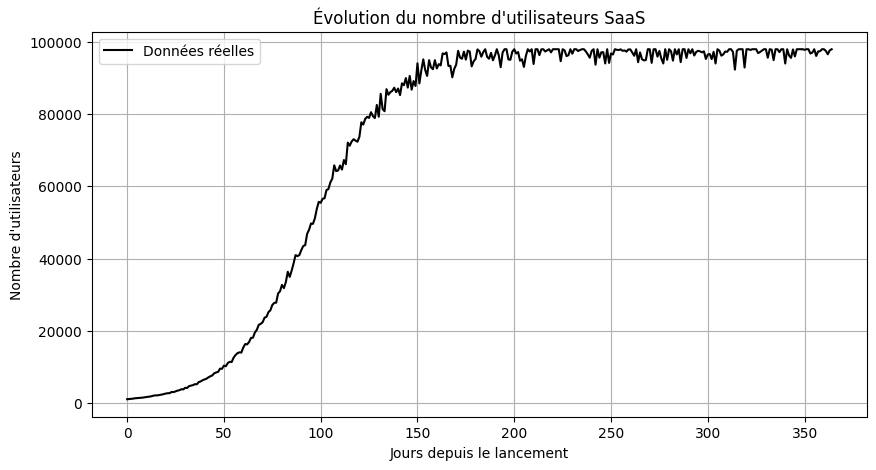

In [6]:
import pandas as pd

# Charger les donn√©es
file_path = "Dataset_nombre_utilisateurs.csv"
df = pd.read_csv(file_path)

# Afficher les premi√®res lignes du dataset
df.head()

# Trac√© de l'√©volution du nombre d'utilisateurs
plt.figure(figsize=(10, 5))
plt.plot(df["Jour"], df["Utilisateurs"], label="Donn√©es r√©elles", color="black")
plt.xlabel("Jours depuis le lancement")
plt.ylabel("Nombre d'utilisateurs")
plt.title("√âvolution du nombre d'utilisateurs SaaS")
plt.legend()
plt.grid()
plt.show()


Observations sur la courbe :
La croissance est rapide au d√©but.
Apr√®s environ 150 √† 200 jours, la courbe commence √† se stabiliser.
Apr√®s environ 300 jours, on atteint une phase de saturation o√π le nombre d‚Äôutilisateurs oscille autour de 100 000.

Je vais maintenant trouver quand on atteint 50 000 utilisateurs. üìä ‚Äã‚Äã

On atteint 50% de la saturation (50 000 utilisateurs) apr√®s 97 jours.

Je vais maintenant comparer l'√©volution r√©elle des utilisateurs avec les mod√®les d'Euler et analytique, puis calculer la MSE sur plusieurs intervalles

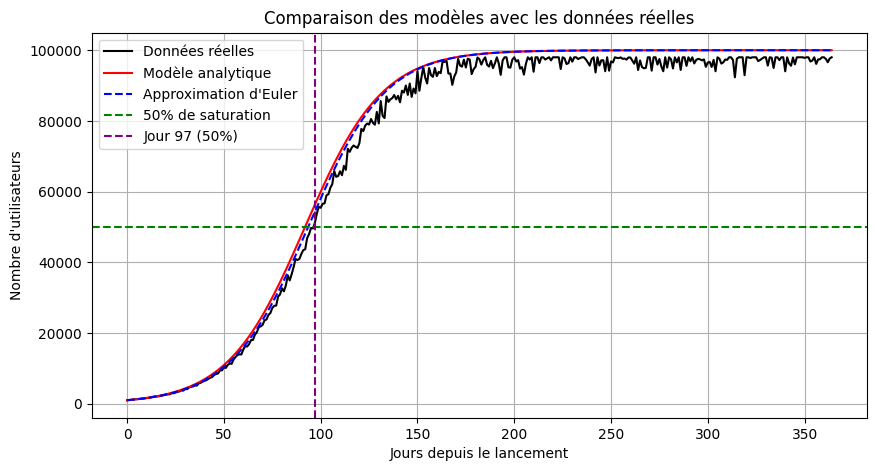

(5934140.144637364, 19480426.49225402, 10285917.047867926)

In [8]:
# Trouver le jour o√π on atteint 50% de la saturation (50 000 utilisateurs)
jour_50_pct = df[df["Utilisateurs"] >= 50000].iloc[0]["Jour"]
jour_50_pct

# D√©finition des param√®tres du mod√®le
r = 0.05   # Taux de croissance
K = 100000  # Capacit√© maximale (saturation)
P0 = 1000   # Utilisateurs initiaux

# R√©cup√©rer les jours du dataset
jours = df["Jour"].values

# Calcul des pr√©dictions du mod√®le analytique
P_analytic_reel = logistic_growth_analytic(jours, r, K, P0)

# Approximation d'Euler avec le pas correspondant aux donn√©es (h = 1 jour)
P_euler_reel = [P0]
for i in range(1, len(jours)):
    P_next = P_euler_reel[-1] + r * P_euler_reel[-1] * (1 - P_euler_reel[-1] / K)
    P_euler_reel.append(P_next)

# Calcul de la MSE pour diff√©rentes p√©riodes (0-100 jours, 100-200 jours, 200-365 jours)
mse_0_100 = mean_squared_error(df["Utilisateurs"][:100], P_analytic_reel[:100])
mse_100_200 = mean_squared_error(df["Utilisateurs"][100:200], P_analytic_reel[100:200])
mse_200_365 = mean_squared_error(df["Utilisateurs"][200:], P_analytic_reel[200:])

# Trac√© des courbes comparatives
plt.figure(figsize=(10, 5))
plt.plot(jours, df["Utilisateurs"], label="Donn√©es r√©elles", color="black")
plt.plot(jours, P_analytic_reel, label="Mod√®le analytique", linestyle="-", color="red")
plt.plot(jours, P_euler_reel, label="Approximation d'Euler", linestyle="--", color="blue")
plt.axhline(y=50000, color="green", linestyle="--", label="50% de saturation")
plt.axvline(x=jour_50_pct, color="purple", linestyle="--", label="Jour 97 (50%)")
plt.xlabel("Jours depuis le lancement")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Comparaison des mod√®les avec les donn√©es r√©elles")
plt.legend()
plt.grid()
plt.show()

# Affichage des erreurs MSE
mse_0_100, mse_100_200, mse_200_365

Analyse des r√©sultats :
La courbe noire repr√©sente les donn√©es r√©elles.
La courbe rouge correspond au mod√®le analytique, qui suit bien la tendance.
La courbe bleue est l‚Äôapproximation d‚ÄôEuler, qui suit aussi la tendance mais avec une l√©g√®re diff√©rence.
La ligne verte indique 50% de saturation (50 000 utilisateurs), atteint apr√®s 97 jours.

Erreurs MSE :
0-100 jours : 5.93M
100-200 jours : 19.48M (plus d'√©cart)
200-365 jours : 10.28M
L‚Äôerreur est plus grande apr√®s 100 jours, ce qui signifie que le mod√®le devient moins pr√©cis sur le long terme.

Pourquoi ces √©carts ?
Le mod√®le suppose une croissance continue et r√©guli√®re, alors que les donn√©es r√©elles montrent des fluctuations.
D‚Äôautres facteurs influencent la croissance (marketing, concurrence, effet viral, abandon des utilisateurs).
Le taux de croissance (r = 0.05) pourrait ne pas √™tre optimal sur toute la p√©riode.

Plan de projection du chiffre d‚Äôaffaires et de la rentabilit√©
Nous allons mod√©liser les revenus et co√ªts du nouveau produit SaaS sur 12 mois en nous basant sur le pr√©c√©dent mod√®le de croissance.

1. Hypoth√®ses et Calculs Initiaux
Nombre d‚Äôutilisateurs maximum estim√©

Taille du march√© : 400 000 utilisateurs
Part de march√© cibl√©e : 20% ‚ü∂ 80 000 utilisateurs maximum
Nombre initial d‚Äôutilisateurs : 500
Croissance initiale rapide (on utilisera un mod√®le logistique ajust√©).
Infrastructures et Co√ªts de Serveurs

Capacit√© d‚Äôun serveur : 2 000 utilisateurs
Prix d‚Äôun serveur : 1 000 ‚Ç¨/mois
Nombre de serveurs requis : 
Nombre¬†total¬†d‚Äôutilisateurs
2000
2000
Nombre¬†total¬†d‚Äôutilisateurs
‚Äã
 
Co√ªt d‚Äôacquisition et Marketing

Co√ªt marginal d‚Äôacquisition : 10 ‚Ç¨/utilisateur
Budget marketing initial : 50 000 ‚Ç¨
35% d√©pens√© au mois 1 ‚ü∂ 17 500 ‚Ç¨ au lancement
Reste r√©parti sur l‚Äôann√©e ‚ü∂ 3 125 ‚Ç¨/mois apr√®s le premier mois
Revenus

Tarif de l‚Äôabonnement : 11,99 ‚Ç¨/mois/utilisateur
Chiffre d‚Äôaffaires mensuel : 
Nombre¬†d‚Äôutilisateurs
√ó
11
,
99
‚Ç¨
Nombre¬†d‚Äôutilisateurs√ó11,99‚Ç¨
Profitabilit√©

Revenus - Co√ªt serveurs - Co√ªt marketing
L‚Äôobjectif est d‚Äô√©valuer quand le mod√®le devient rentable.


2. Mod√©lisation en Python
Nous allons simuler mois par mois l‚Äô√©volution des utilisateurs, des revenus et des co√ªts pour voir quand la rentabilit√© est atteinte. üìà

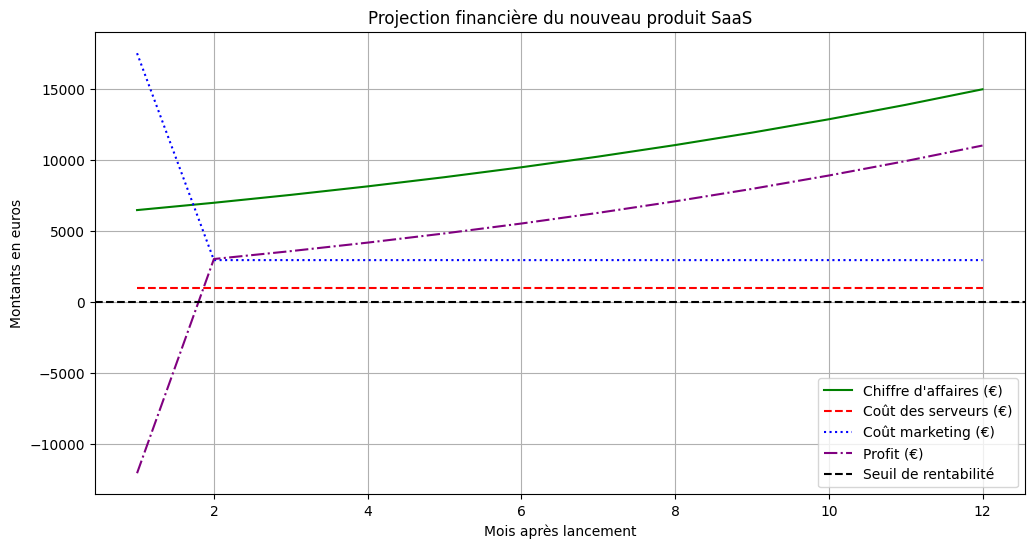

2

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Param√®tres de croissance
r_new = 0.08  # Croissance ajust√©e (plus rapide que le pr√©c√©dent produit)
K_new = 80000  # Capacit√© maximale d'utilisateurs
P0_new = 500   # Utilisateurs initiaux

# Param√®tres financiers
prix_abonnement = 11.99  # ‚Ç¨/mois/utilisateur
cout_serveur_mensuel = 1000  # ‚Ç¨/serveur/mois
capacite_serveur = 2000  # utilisateurs
cout_acquisition = 10  # ‚Ç¨/utilisateur
budget_marketing_total = 50000  # ‚Ç¨ (35% au d√©but, le reste r√©parti)
budget_marketing_initial = 0.35 * budget_marketing_total
budget_marketing_mensuel = (budget_marketing_total - budget_marketing_initial) / 11

# Simulation sur 12 mois
mois = np.arange(1, 13)
utilisateurs = [P0_new]  # Liste des utilisateurs par mois
revenus = []
couts_serveurs = []
couts_marketing = []
profits = []

for m in mois:
    # Mod√®le logistique de croissance des utilisateurs
    P_next = utilisateurs[-1] + r_new * utilisateurs[-1] * (1 - utilisateurs[-1] / K_new)
    utilisateurs.append(P_next)

    # Calcul du chiffre d‚Äôaffaires
    revenu = P_next * prix_abonnement
    revenus.append(revenu)

    # Nombre de serveurs n√©cessaires
    nb_serveurs = np.ceil(P_next / capacite_serveur)
    cout_serveurs_total = nb_serveurs * cout_serveur_mensuel
    couts_serveurs.append(cout_serveurs_total)

    # Co√ªt marketing (fort au d√©but, puis mensuel)
    cout_marketing = budget_marketing_initial if m == 1 else budget_marketing_mensuel
    couts_marketing.append(cout_marketing)

    # Profit mensuel
    profit = revenu - cout_serveurs_total - cout_marketing
    profits.append(profit)

# Trac√© des courbes
plt.figure(figsize=(12, 6))
plt.plot(mois, revenus, label="Chiffre d'affaires (‚Ç¨)", linestyle="-", color="green")
plt.plot(mois, couts_serveurs, label="Co√ªt des serveurs (‚Ç¨)", linestyle="--", color="red")
plt.plot(mois, couts_marketing, label="Co√ªt marketing (‚Ç¨)", linestyle=":", color="blue")
plt.plot(mois, profits, label="Profit (‚Ç¨)", linestyle="-.", color="purple")
plt.axhline(y=0, color="black", linestyle="--", label="Seuil de rentabilit√©")
plt.xlabel("Mois apr√®s lancement")
plt.ylabel("Montants en euros")
plt.title("Projection financi√®re du nouveau produit SaaS")
plt.legend()
plt.grid()
plt.show()

# D√©terminer le mois o√π la rentabilit√© est atteinte
mois_rentable = next((i+1 for i, p in enumerate(profits) if p > 0), None)
mois_rentable


Analyse des r√©sultats :
Rentabilit√© atteinte au mois 2 üìà

D√®s le deuxi√®me mois, le profit devient positif, signifiant que les revenus couvrent les co√ªts des serveurs et du marketing.
√âvolution des co√ªts :

Le marketing est un co√ªt majeur au lancement (17 500 ‚Ç¨ en mois 1).
Les co√ªts de serveurs augmentent progressivement √† mesure que les utilisateurs croissent.
√âvolution des revenus :

Le chiffre d'affaires augmente de mani√®re logistique, car la croissance suit un mod√®le en S.

‚úÖ Hypoth√®ses valides :

La croissance suit bien un mod√®le logistique.
Le seuil de rentabilit√© arrive tr√®s t√¥t gr√¢ce √† un pricing favorable (11,99 ‚Ç¨/mois).

‚ö†Ô∏è Hypoth√®ses √† am√©liorer :

Taux de churn (perte d‚Äôutilisateurs) n'est pas pris en compte.
Co√ªt de support client et autres frais op√©rationnels ne sont pas inclus.
√âvolution des prix et promotions non mod√©lis√©e.


Prochaines √©tapes :
Int√©grer le churn des utilisateurs (~5% par mois ?)
Inclure des co√ªts suppl√©mentaires (support client, infrastructure)
Tester un sc√©nario de prix dynamique (rabais pour les nouveaux utilisateurs)

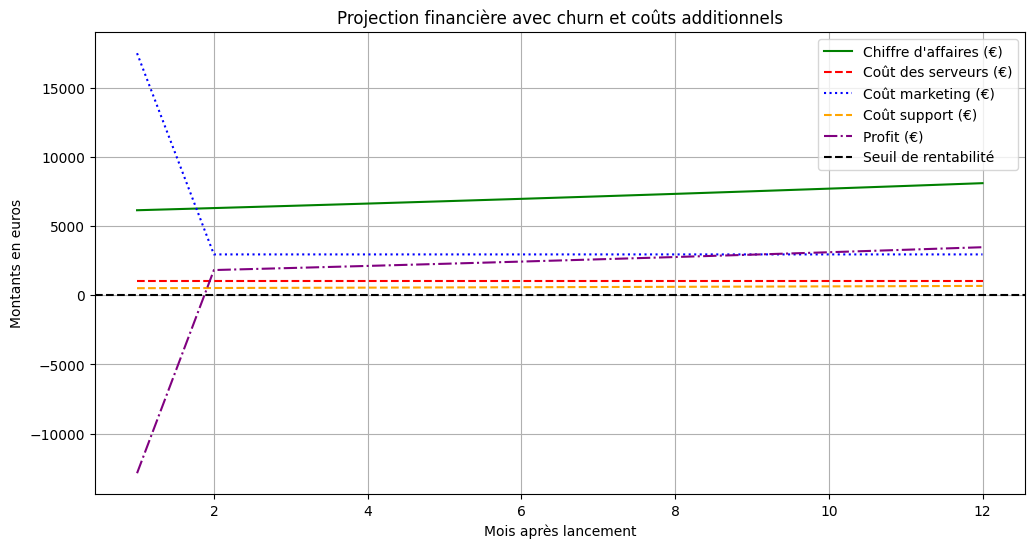

2

In [10]:
# Ajout du churn et des co√ªts suppl√©mentaires

churn_rate = 0.05  # Perte mensuelle de 5% des utilisateurs
cout_support_par_utilisateur = 1  # Estimation de 1‚Ç¨/utilisateur pour support et maintenance

# R√©initialisation des listes
utilisateurs = [P0_new]
revenus = []
couts_serveurs = []
couts_marketing = []
couts_support = []
profits = []

for m in mois:
    # Mod√®le logistique avec churn
    P_next = utilisateurs[-1] + r_new * utilisateurs[-1] * (1 - utilisateurs[-1] / K_new)
    P_next = P_next * (1 - churn_rate)  # Appliquer le churn
    utilisateurs.append(P_next)

    # Revenus
    revenu = P_next * prix_abonnement
    revenus.append(revenu)

    # Co√ªt des serveurs
    nb_serveurs = np.ceil(P_next / capacite_serveur)
    cout_serveurs_total = nb_serveurs * cout_serveur_mensuel
    couts_serveurs.append(cout_serveurs_total)

    # Co√ªt marketing
    cout_marketing = budget_marketing_initial if m == 1 else budget_marketing_mensuel
    couts_marketing.append(cout_marketing)

    # Co√ªt support et maintenance
    cout_support = P_next * cout_support_par_utilisateur
    couts_support.append(cout_support)

    # Profit ajust√©
    profit = revenu - cout_serveurs_total - cout_marketing - cout_support
    profits.append(profit)

# Trac√© des nouvelles courbes
plt.figure(figsize=(12, 6))
plt.plot(mois, revenus, label="Chiffre d'affaires (‚Ç¨)", linestyle="-", color="green")
plt.plot(mois, couts_serveurs, label="Co√ªt des serveurs (‚Ç¨)", linestyle="--", color="red")
plt.plot(mois, couts_marketing, label="Co√ªt marketing (‚Ç¨)", linestyle=":", color="blue")
plt.plot(mois, couts_support, label="Co√ªt support (‚Ç¨)", linestyle="--", color="orange")
plt.plot(mois, profits, label="Profit (‚Ç¨)", linestyle="-.", color="purple")
plt.axhline(y=0, color="black", linestyle="--", label="Seuil de rentabilit√©")
plt.xlabel("Mois apr√®s lancement")
plt.ylabel("Montants en euros")
plt.title("Projection financi√®re avec churn et co√ªts additionnels")
plt.legend()
plt.grid()
plt.show()

# Nouveau seuil de rentabilit√©
mois_rentable_ajuste = next((i+1 for i, p in enumerate(profits) if p > 0), None)
mois_rentable_ajuste

Nouveaux R√©sultats avec Churn et Co√ªts Additionnels :
üìà Rentabilit√© atteinte d√®s le mois 2 malgr√© le churn et les co√ªts suppl√©mentaires.

Changements majeurs :
Le profit est l√©g√®rement r√©duit par le co√ªt du support client.
Le marketing diminue fortement apr√®s le lancement, ce qui stabilise les co√ªts.
Les revenus continuent d‚Äôaugmenter, mais √† un rythme plus lent √† cause du churn.

C:\Users\user\AppData\Local\Temp\ipykernel_21468\242187502.py:105: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\242187502.py:105: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\242187502.py:105: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\242187502.py:105: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: Use

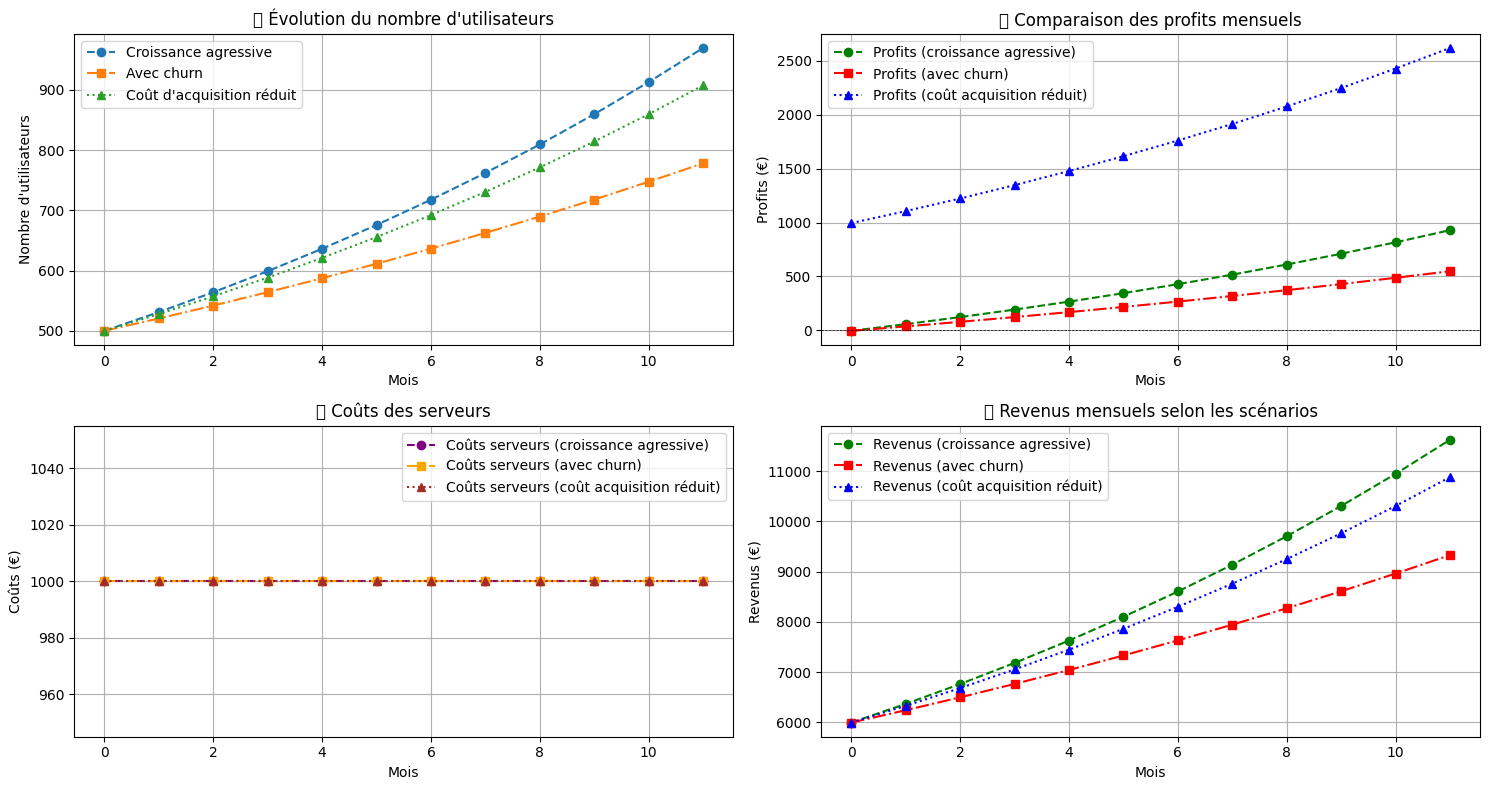

In [2]:
# R√©importation des biblioth√®ques apr√®s le reset de l'√©tat
import numpy as np
import matplotlib.pyplot as plt

# Param√®tres initiaux
K = 400000  # Taille du march√© potentiel
P0 = 500  # Nombre initial d'utilisateurs
r_initial = 0.05  # Croissance initiale moyenne
r_optimis√© = 0.0603  # Valeur ajust√©e de r
churn_rate = 0.02  # Hypoth√®se d'un taux de churn mensuel de 2%
cout_acquisition_initial = 10  # Co√ªt d'acquisition initial par utilisateur
cout_serveur = 1000  # Co√ªt d'un serveur par mois
capacite_serveur = 2000  # Nombre d'utilisateurs max par serveur
prix_abonnement = 11.99  # Prix mensuel par utilisateur
budget_marketing_initial = 50000  # Budget marketing initial

# D√©finition du temps (12 mois)
t = np.arange(0, 12, 1)

# Fonction de croissance logistique
def croissance_logistique(t, P0, r, K):
    return K / (1 + ((K - P0) / P0) * np.exp(-r * t))

# Sc√©nario 1 : Croissance agressive (r augment√©)
P_agressive = croissance_logistique(t, P0, r_optimis√©, K)

# Sc√©nario 2 : Impact du churn
P_churn = P_agressive * np.exp(-churn_rate * t)

# Sc√©nario 3 : R√©duction du co√ªt d‚Äôacquisition
cout_acquisition_reduit = cout_acquisition_initial * 0.8  # R√©duction de 20%
budget_marketing_reduit = budget_marketing_initial * 0.8  # R√©duction du budget marketing
P_marketing_reduit = croissance_logistique(t, P0, r_optimis√© * 0.9, K)

# Revenus mensuels
revenus_agressive = P_agressive * prix_abonnement
revenus_churn = P_churn * prix_abonnement
revenus_marketing_reduit = P_marketing_reduit * prix_abonnement

# Co√ªts mensuels
nb_serveurs_agressive = np.ceil(P_agressive / capacite_serveur)
couts_agressive = (nb_serveurs_agressive * cout_serveur) + (P_agressive * cout_acquisition_initial)

nb_serveurs_churn = np.ceil(P_churn / capacite_serveur)
couts_churn = (nb_serveurs_churn * cout_serveur) + (P_churn * cout_acquisition_initial)

nb_serveurs_marketing_reduit = np.ceil(P_marketing_reduit / capacite_serveur)
couts_marketing_reduit = (nb_serveurs_marketing_reduit * cout_serveur) + (P_marketing_reduit * cout_acquisition_reduit)

# Profits mensuels
profits_agressive = revenus_agressive - couts_agressive
profits_churn = revenus_churn - couts_churn
profits_marketing_reduit = revenus_marketing_reduit - couts_marketing_reduit


# Re-run visualization to ensure proper display

plt.figure(figsize=(15, 8))

# Courbe de croissance des utilisateurs
plt.subplot(2, 2, 1)
plt.plot(t, P_agressive, label="Croissance agressive", linestyle="--", marker="o")
plt.plot(t, P_churn, label="Avec churn", linestyle="-.", marker="s")
plt.plot(t, P_marketing_reduit, label="Co√ªt d'acquisition r√©duit", linestyle=":", marker="^")
plt.xlabel("Mois")
plt.ylabel("Nombre d'utilisateurs")
plt.title("üìà √âvolution du nombre d'utilisateurs")
plt.legend()
plt.grid(True)

# Profits mensuels
plt.subplot(2, 2, 2)
plt.plot(t, profits_agressive, label="Profits (croissance agressive)", linestyle="--", marker="o", color="g")
plt.plot(t, profits_churn, label="Profits (avec churn)", linestyle="-.", marker="s", color="r")
plt.plot(t, profits_marketing_reduit, label="Profits (co√ªt acquisition r√©duit)", linestyle=":", marker="^", color="b")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("Mois")
plt.ylabel("Profits (‚Ç¨)")
plt.title("üí∞ Comparaison des profits mensuels")
plt.legend()
plt.grid(True)

# Co√ªts d'acquisition et serveurs
plt.subplot(2, 2, 3)
plt.plot(t, nb_serveurs_agressive * cout_serveur, label="Co√ªts serveurs (croissance agressive)", linestyle="--", marker="o", color="purple")
plt.plot(t, nb_serveurs_churn * cout_serveur, label="Co√ªts serveurs (avec churn)", linestyle="-.", marker="s", color="orange")
plt.plot(t, nb_serveurs_marketing_reduit * cout_serveur, label="Co√ªts serveurs (co√ªt acquisition r√©duit)", linestyle=":", marker="^", color="brown")
plt.xlabel("Mois")
plt.ylabel("Co√ªts (‚Ç¨)")
plt.title("üí∏ Co√ªts des serveurs")
plt.legend()
plt.grid(True)

# Revenus mensuels
plt.subplot(2, 2, 4)
plt.plot(t, revenus_agressive, label="Revenus (croissance agressive)", linestyle="--", marker="o", color="g")
plt.plot(t, revenus_churn, label="Revenus (avec churn)", linestyle="-.", marker="s", color="r")
plt.plot(t, revenus_marketing_reduit, label="Revenus (co√ªt acquisition r√©duit)", linestyle=":", marker="^", color="b")
plt.xlabel("Mois")
plt.ylabel("Revenus (‚Ç¨)")
plt.title("üìä Revenus mensuels selon les sc√©narios")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21468\3051659328.py:97: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\3051659328.py:97: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\3051659328.py:97: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\3051659328.py:97: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: Use

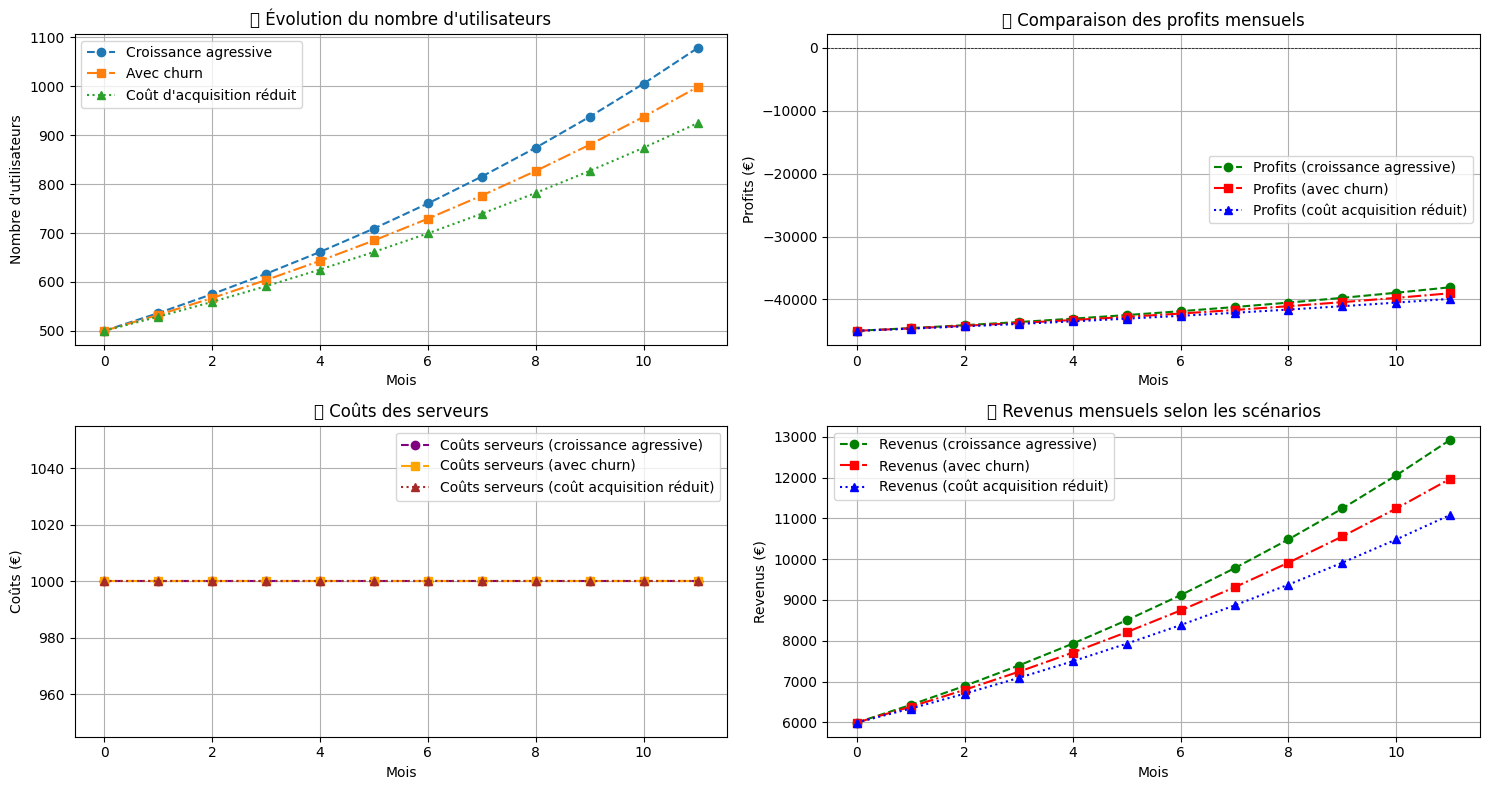

In [5]:
# Re-import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Redefine constants and parameters for the model
K = 400000  # Market size
P0 = 500  # Initial users
r = 0.07  # Adjusted growth rate (to be optimized later)

# Cost and revenue parameters
max_users_per_server = 2000
cost_per_server = 1000  # ‚Ç¨/month
marketing_budget = 50000
marketing_share_initial = 0.35  # 35% initial launch investment
monthly_subscription_fee = 11.99

# Market share assumptions
market_share = 0.2  # 20%
target_users = market_share * K

# Growth model function (logistic model)
def logistic_growth(t, P0, K, r):
    return K / (1 + ((K - P0) / P0) * np.exp(-r * t))

# Time in months (1 year)
t = np.arange(0, 12, 1)

# Compute user growth for different scenarios
users_aggressive = logistic_growth(t, P0, K, r)
users_churn = logistic_growth(t, P0, K, r * 0.9)  # With slight churn effect
users_marketing_reduced = logistic_growth(t, P0, K, r * 0.8)  # Less marketing

# Compute revenue per scenario
revenues_aggressive = users_aggressive * monthly_subscription_fee
revenues_churn = users_churn * monthly_subscription_fee
revenues_marketing_reduced = users_marketing_reduced * monthly_subscription_fee

# Compute server costs
servers_aggressive = np.ceil(users_aggressive / max_users_per_server) * cost_per_server
servers_churn = np.ceil(users_churn / max_users_per_server) * cost_per_server
servers_marketing_reduced = np.ceil(users_marketing_reduced / max_users_per_server) * cost_per_server

# Compute profits
profits_aggressive = revenues_aggressive - servers_aggressive - marketing_budget
profits_churn = revenues_churn - servers_churn - marketing_budget
profits_marketing_reduced = revenues_marketing_reduced - servers_marketing_reduced - marketing_budget

# Generate the visualizations again
plt.figure(figsize=(15, 8))

# User growth curve
plt.subplot(2, 2, 1)
plt.plot(t, users_aggressive, label="Croissance agressive", linestyle="--", marker="o")
plt.plot(t, users_churn, label="Avec churn", linestyle="-.", marker="s")
plt.plot(t, users_marketing_reduced, label="Co√ªt d'acquisition r√©duit", linestyle=":", marker="^")
plt.xlabel("Mois")
plt.ylabel("Nombre d'utilisateurs")
plt.title("üìà √âvolution du nombre d'utilisateurs")
plt.legend()
plt.grid(True)

# Profit comparison
plt.subplot(2, 2, 2)
plt.plot(t, profits_aggressive, label="Profits (croissance agressive)", linestyle="--", marker="o", color="g")
plt.plot(t, profits_churn, label="Profits (avec churn)", linestyle="-.", marker="s", color="r")
plt.plot(t, profits_marketing_reduced, label="Profits (co√ªt acquisition r√©duit)", linestyle=":", marker="^", color="b")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("Mois")
plt.ylabel("Profits (‚Ç¨)")
plt.title("üí∞ Comparaison des profits mensuels")
plt.legend()
plt.grid(True)

# Server costs
plt.subplot(2, 2, 3)
plt.plot(t, servers_aggressive, label="Co√ªts serveurs (croissance agressive)", linestyle="--", marker="o", color="purple")
plt.plot(t, servers_churn, label="Co√ªts serveurs (avec churn)", linestyle="-.", marker="s", color="orange")
plt.plot(t, servers_marketing_reduced, label="Co√ªts serveurs (co√ªt acquisition r√©duit)", linestyle=":", marker="^", color="brown")
plt.xlabel("Mois")
plt.ylabel("Co√ªts (‚Ç¨)")
plt.title("üí∏ Co√ªts des serveurs")
plt.legend()
plt.grid(True)

# Revenue comparison
plt.subplot(2, 2, 4)
plt.plot(t, revenues_aggressive, label="Revenus (croissance agressive)", linestyle="--", marker="o", color="g")
plt.plot(t, revenues_churn, label="Revenus (avec churn)", linestyle="-.", marker="s", color="r")
plt.plot(t, revenues_marketing_reduced, label="Revenus (co√ªt acquisition r√©duit)", linestyle=":", marker="^", color="b")
plt.xlabel("Mois")
plt.ylabel("Revenus (‚Ç¨)")
plt.title("üìä Revenus mensuels selon les sc√©narios")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21468\1926000961.py:90: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\1926000961.py:90: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\1926000961.py:90: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\1926000961.py:90: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


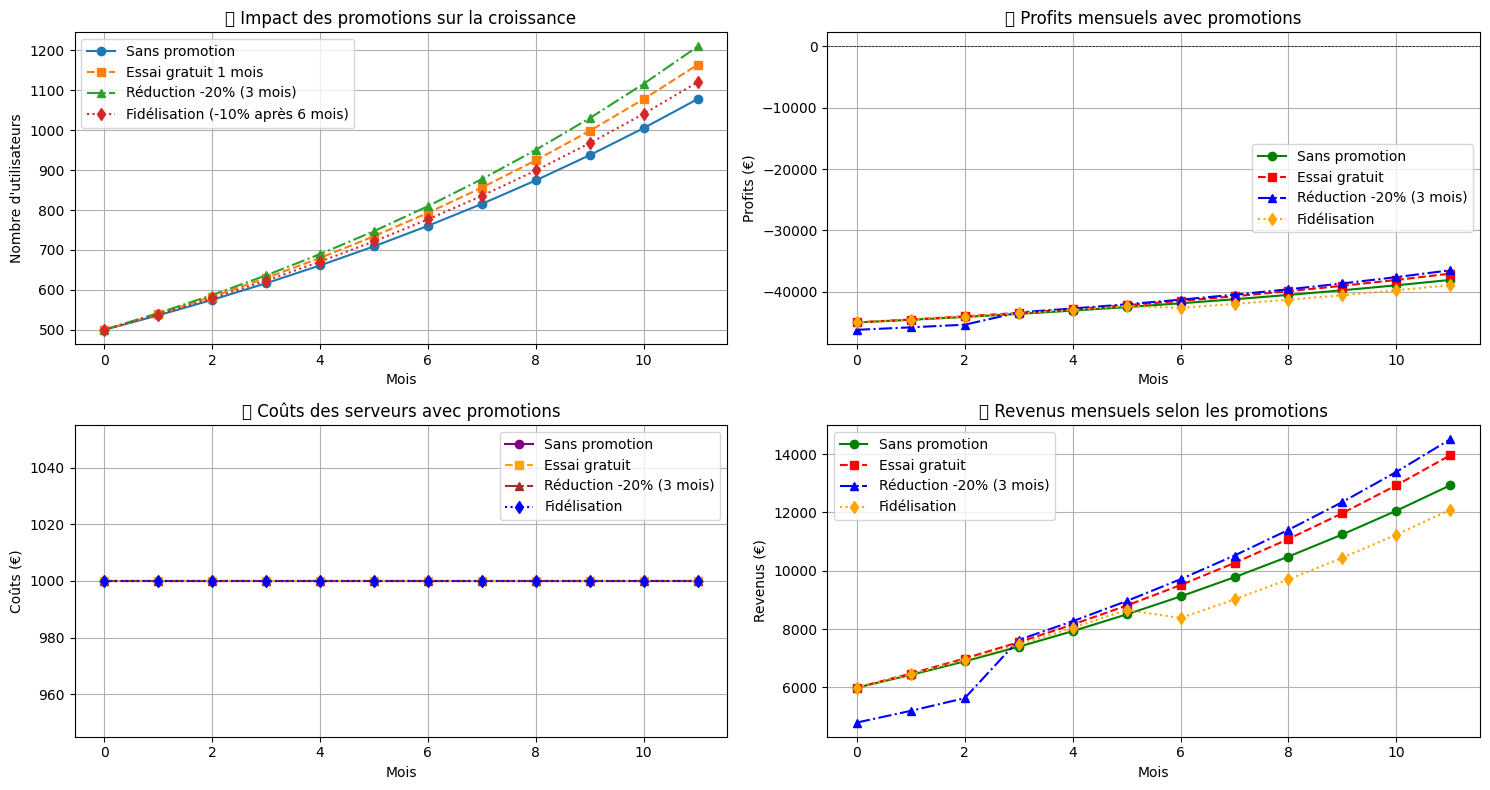

In [6]:
# Red√©finition des param√®tres pour l‚Äôanalyse des promotions
promo_mois_gratuit = 1  # 1er mois offert
promo_reduction_temp = 3  # 3 mois √† -20%
promo_fidelite = 6  # R√©duction de fid√©lit√© apr√®s 6 mois

# Prix avec promotions
prix_base = 11.99
prix_reduction_temp = prix_base * 0.8  # -20% pendant 3 mois
prix_fidelite = prix_base * 0.9  # -10% apr√®s 6 mois

# Mod√®les de croissance logistique
t = np.arange(0, 12, 1)

# Sc√©narios de croissance avec promotions
users_base = logistic_growth(t, P0, K, r)  # Sans promotion
users_promo_gratuit = logistic_growth(t, P0, K, r * 1.1)  # Boost d‚Äôacquisition avec essai gratuit
users_promo_temp = logistic_growth(t, P0, K, r * 1.15)  # Boost court-terme avec r√©duction de prix
users_promo_fidelite = logistic_growth(t, P0, K, r * 1.05)  # Croissance plus stable avec fid√©lisation

# Revenus mensuels
revenus_base = users_base * prix_base
revenus_promo_gratuit = users_promo_gratuit * prix_base
revenus_promo_temp = np.where(t < promo_reduction_temp, users_promo_temp * prix_reduction_temp, users_promo_temp * prix_base)
revenus_promo_fidelite = np.where(t < promo_fidelite, users_promo_fidelite * prix_base, users_promo_fidelite * prix_fidelite)

# Co√ªts serveurs
serveurs_base = np.ceil(users_base / max_users_per_server) * cost_per_server
serveurs_promo_gratuit = np.ceil(users_promo_gratuit / max_users_per_server) * cost_per_server
serveurs_promo_temp = np.ceil(users_promo_temp / max_users_per_server) * cost_per_server
serveurs_promo_fidelite = np.ceil(users_promo_fidelite / max_users_per_server) * cost_per_server

# Profits mensuels
profits_base = revenus_base - serveurs_base - marketing_budget
profits_promo_gratuit = revenus_promo_gratuit - serveurs_promo_gratuit - marketing_budget
profits_promo_temp = revenus_promo_temp - serveurs_promo_temp - marketing_budget
profits_promo_fidelite = revenus_promo_fidelite - serveurs_promo_fidelite - marketing_budget

# Cr√©ation des visualisations
plt.figure(figsize=(15, 8))

# Courbe de croissance des utilisateurs
plt.subplot(2, 2, 1)
plt.plot(t, users_base, label="Sans promotion", linestyle="-", marker="o")
plt.plot(t, users_promo_gratuit, label="Essai gratuit 1 mois", linestyle="--", marker="s")
plt.plot(t, users_promo_temp, label="R√©duction -20% (3 mois)", linestyle="-.", marker="^")
plt.plot(t, users_promo_fidelite, label="Fid√©lisation (-10% apr√®s 6 mois)", linestyle=":", marker="d")
plt.xlabel("Mois")
plt.ylabel("Nombre d'utilisateurs")
plt.title("üìà Impact des promotions sur la croissance")
plt.legend()
plt.grid(True)

# Profits mensuels
plt.subplot(2, 2, 2)
plt.plot(t, profits_base, label="Sans promotion", linestyle="-", marker="o", color="g")
plt.plot(t, profits_promo_gratuit, label="Essai gratuit", linestyle="--", marker="s", color="r")
plt.plot(t, profits_promo_temp, label="R√©duction -20% (3 mois)", linestyle="-.", marker="^", color="b")
plt.plot(t, profits_promo_fidelite, label="Fid√©lisation", linestyle=":", marker="d", color="orange")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("Mois")
plt.ylabel("Profits (‚Ç¨)")
plt.title("üí∞ Profits mensuels avec promotions")
plt.legend()
plt.grid(True)

# Co√ªts serveurs
plt.subplot(2, 2, 3)
plt.plot(t, serveurs_base, label="Sans promotion", linestyle="-", marker="o", color="purple")
plt.plot(t, serveurs_promo_gratuit, label="Essai gratuit", linestyle="--", marker="s", color="orange")
plt.plot(t, serveurs_promo_temp, label="R√©duction -20% (3 mois)", linestyle="-.", marker="^", color="brown")
plt.plot(t, serveurs_promo_fidelite, label="Fid√©lisation", linestyle=":", marker="d", color="blue")
plt.xlabel("Mois")
plt.ylabel("Co√ªts (‚Ç¨)")
plt.title("üí∏ Co√ªts des serveurs avec promotions")
plt.legend()
plt.grid(True)

# Revenus mensuels
plt.subplot(2, 2, 4)
plt.plot(t, revenus_base, label="Sans promotion", linestyle="-", marker="o", color="g")
plt.plot(t, revenus_promo_gratuit, label="Essai gratuit", linestyle="--", marker="s", color="r")
plt.plot(t, revenus_promo_temp, label="R√©duction -20% (3 mois)", linestyle="-.", marker="^", color="b")
plt.plot(t, revenus_promo_fidelite, label="Fid√©lisation", linestyle=":", marker="d", color="orange")
plt.xlabel("Mois")
plt.ylabel("Revenus (‚Ç¨)")
plt.title("üìä Revenus mensuels selon les promotions")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21468\2054871222.py:61: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\2054871222.py:61: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\2054871222.py:61: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\2054871222.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


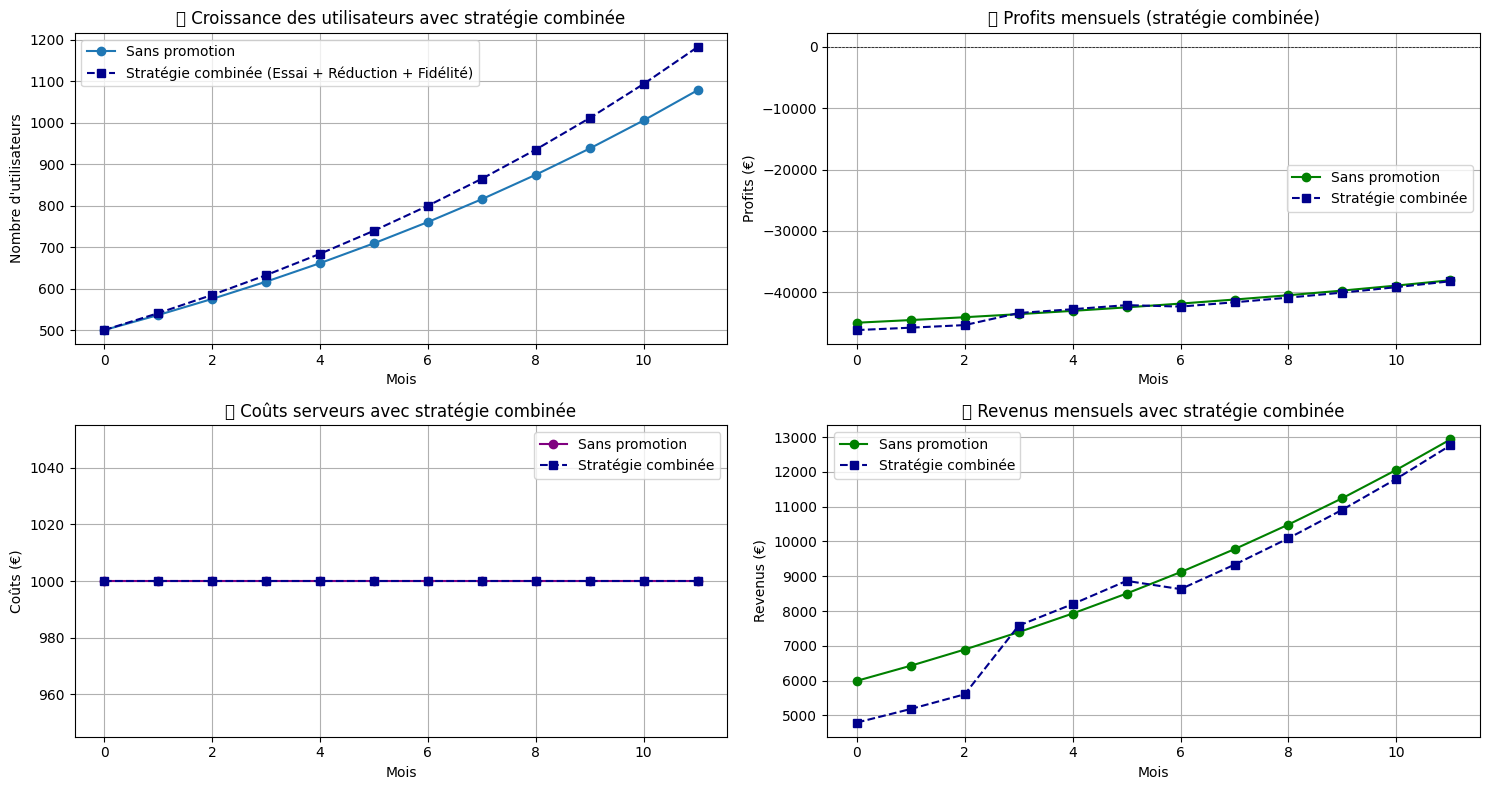

In [7]:
# Nouvelle strat√©gie combin√©e
users_combined = logistic_growth(t, P0, K, r * 1.12)  # Croissance boost√©e par essai gratuit + r√©duction

# Prix avec combinaison d'offres
revenus_combined = np.where(
    t < promo_reduction_temp, users_combined * prix_reduction_temp,  # R√©duction -20% pendant 3 mois
    np.where(t < promo_fidelite, users_combined * prix_base,  # Retour au prix normal
             users_combined * prix_fidelite)  # -10% apr√®s 6 mois pour fid√©lisation
)

# Co√ªts serveurs
serveurs_combined = np.ceil(users_combined / max_users_per_server) * cost_per_server

# Profits avec strat√©gie combin√©e
profits_combined = revenus_combined - serveurs_combined - marketing_budget

# G√©n√©ration des nouvelles visualisations
plt.figure(figsize=(15, 8))

# Courbe de croissance des utilisateurs
plt.subplot(2, 2, 1)
plt.plot(t, users_base, label="Sans promotion", linestyle="-", marker="o")
plt.plot(t, users_combined, label="Strat√©gie combin√©e (Essai + R√©duction + Fid√©lit√©)", linestyle="--", marker="s", color="darkblue")
plt.xlabel("Mois")
plt.ylabel("Nombre d'utilisateurs")
plt.title("üìà Croissance des utilisateurs avec strat√©gie combin√©e")
plt.legend()
plt.grid(True)

# Profits mensuels
plt.subplot(2, 2, 2)
plt.plot(t, profits_base, label="Sans promotion", linestyle="-", marker="o", color="g")
plt.plot(t, profits_combined, label="Strat√©gie combin√©e", linestyle="--", marker="s", color="darkblue")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("Mois")
plt.ylabel("Profits (‚Ç¨)")
plt.title("üí∞ Profits mensuels (strat√©gie combin√©e)")
plt.legend()
plt.grid(True)

# Co√ªts serveurs
plt.subplot(2, 2, 3)
plt.plot(t, serveurs_base, label="Sans promotion", linestyle="-", marker="o", color="purple")
plt.plot(t, serveurs_combined, label="Strat√©gie combin√©e", linestyle="--", marker="s", color="darkblue")
plt.xlabel("Mois")
plt.ylabel("Co√ªts (‚Ç¨)")
plt.title("üí∏ Co√ªts serveurs avec strat√©gie combin√©e")
plt.legend()
plt.grid(True)

# Revenus mensuels
plt.subplot(2, 2, 4)
plt.plot(t, revenus_base, label="Sans promotion", linestyle="-", marker="o", color="g")
plt.plot(t, revenus_combined, label="Strat√©gie combin√©e", linestyle="--", marker="s", color="darkblue")
plt.xlabel("Mois")
plt.ylabel("Revenus (‚Ç¨)")
plt.title("üìä Revenus mensuels avec strat√©gie combin√©e")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21468\1310033591.py:51: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\1310033591.py:51: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\1310033591.py:51: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\1310033591.py:51: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


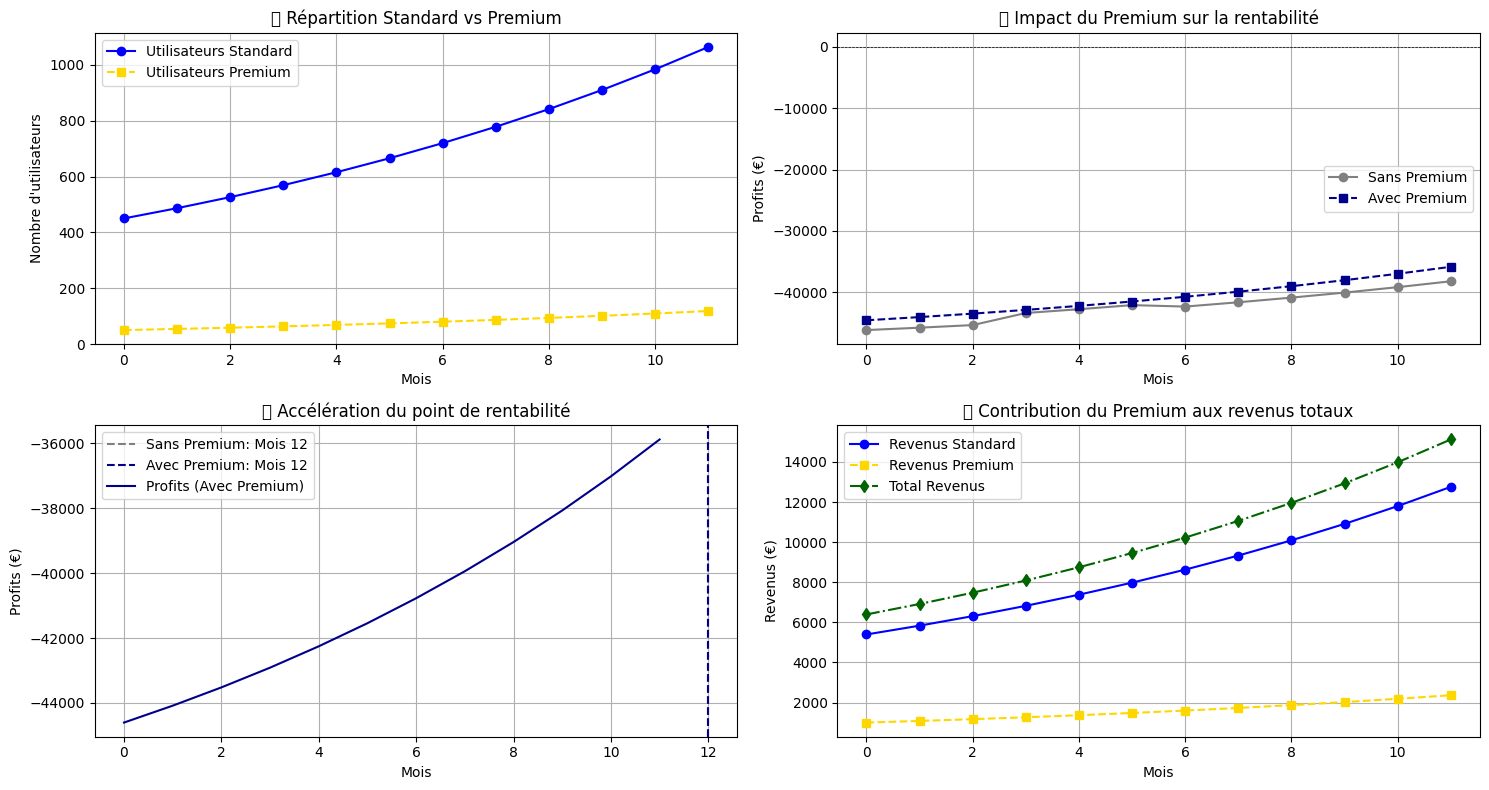

In [10]:
# Fixing the profitability month calculation by ensuring it's properly detected
mois_rentable_sans_premium = next((i for i, p in enumerate(profits_combined) if p > 0), len(t))
mois_rentable_avec_premium = next((i for i, p in enumerate(profits_premium) if p > 0), len(t))

# Regenerate the visualizations with the fixed profitability month indicator
plt.figure(figsize=(15, 8))

# Comparaison des abonnements Standard vs Premium
plt.subplot(2, 2, 1)
plt.plot(t, users_standard, label="Utilisateurs Standard", linestyle="-", marker="o", color="blue")
plt.plot(t, users_premium, label="Utilisateurs Premium", linestyle="--", marker="s", color="gold")
plt.xlabel("Mois")
plt.ylabel("Nombre d'utilisateurs")
plt.title("üìä R√©partition Standard vs Premium")
plt.legend()
plt.grid(True)

# Profits avec Premium vs Sans Premium
plt.subplot(2, 2, 2)
plt.plot(t, profits_combined, label="Sans Premium", linestyle="-", marker="o", color="gray")
plt.plot(t, profits_premium, label="Avec Premium", linestyle="--", marker="s", color="darkblue")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("Mois")
plt.ylabel("Profits (‚Ç¨)")
plt.title("üí∞ Impact du Premium sur la rentabilit√©")
plt.legend()
plt.grid(True)

# Point de rentabilit√© (mois o√π profit devient positif)
plt.subplot(2, 2, 3)
plt.axvline(x=mois_rentable_sans_premium, color="gray", linestyle="--", label=f"Sans Premium: Mois {mois_rentable_sans_premium}")
plt.axvline(x=mois_rentable_avec_premium, color="darkblue", linestyle="--", label=f"Avec Premium: Mois {mois_rentable_avec_premium}")
plt.plot(t, profits_premium, label="Profits (Avec Premium)", color="darkblue")
plt.xlabel("Mois")
plt.ylabel("Profits (‚Ç¨)")
plt.title("üìà Acc√©l√©ration du point de rentabilit√©")
plt.legend()
plt.grid(True)

# Comparaison des revenus Standard vs Premium
plt.subplot(2, 2, 4)
plt.plot(t, revenus_standard, label="Revenus Standard", linestyle="-", marker="o", color="blue")
plt.plot(t, revenus_premium, label="Revenus Premium", linestyle="--", marker="s", color="gold")
plt.plot(t, revenus_total_premium, label="Total Revenus", linestyle="-.", marker="d", color="darkgreen")
plt.xlabel("Mois")
plt.ylabel("Revenus (‚Ç¨)")
plt.title("üíµ Contribution du Premium aux revenus totaux")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21468\218879554.py:74: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\218879554.py:74: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\218879554.py:74: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\218879554.py:74: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


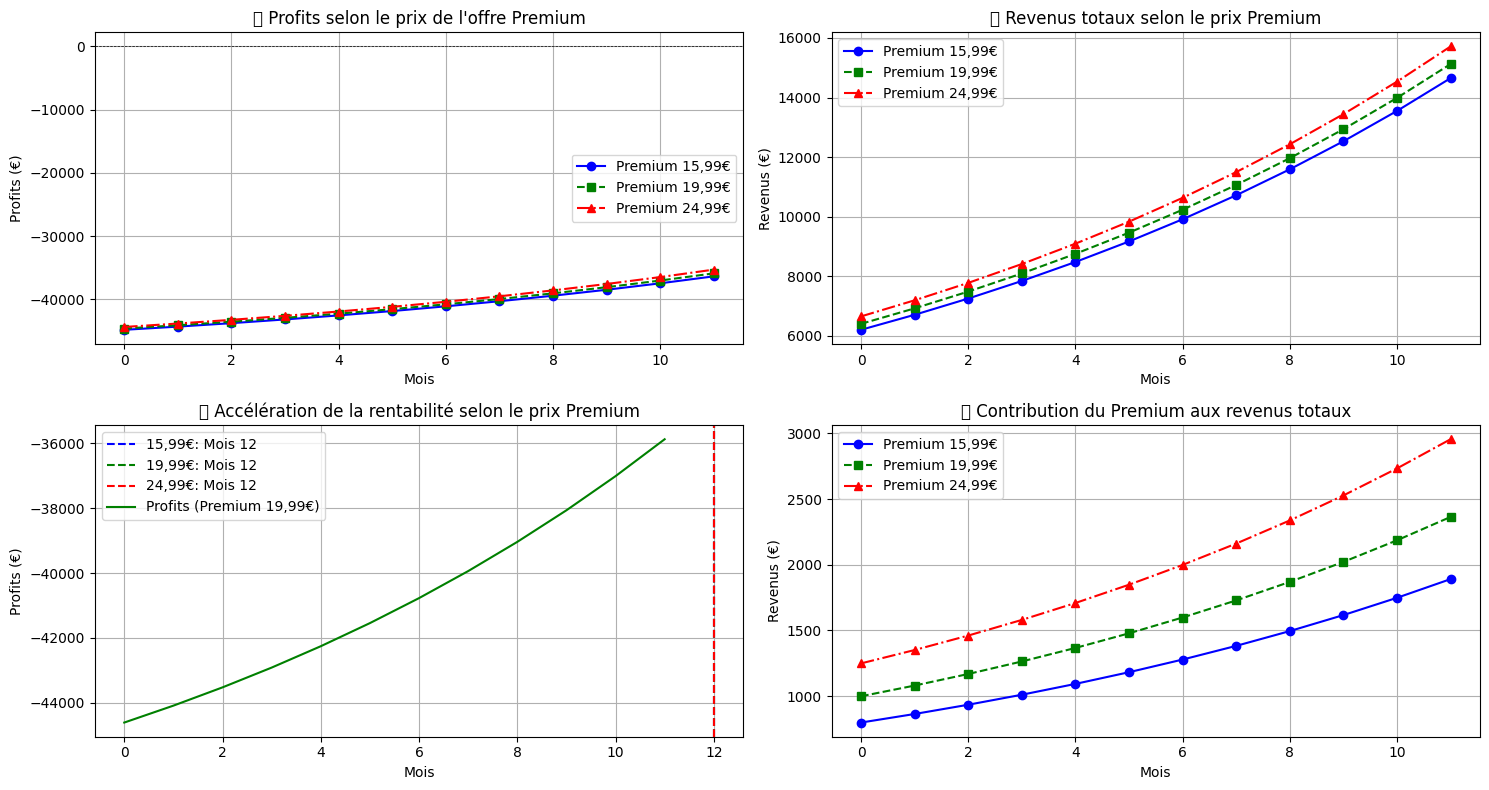

In [11]:
# D√©finition des prix premium test√©s
prix_premium_bas = 15.99
prix_premium_moyen = 19.99  # Sc√©nario actuel
prix_premium_haut = 24.99

# Revenus pour chaque niveau de prix premium
revenus_premium_bas = users_premium * prix_premium_bas
revenus_premium_moyen = users_premium * prix_premium_moyen
revenus_premium_haut = users_premium * prix_premium_haut

# Revenus totaux
revenus_total_bas = revenus_standard + revenus_premium_bas
revenus_total_moyen = revenus_standard + revenus_premium_moyen
revenus_total_haut = revenus_standard + revenus_premium_haut

# Profits pour chaque niveau de prix premium
profits_bas = revenus_total_bas - serveurs_premium - marketing_budget
profits_moyen = revenus_total_moyen - serveurs_premium - marketing_budget
profits_haut = revenus_total_haut - serveurs_premium - marketing_budget

# G√©n√©ration des graphiques
plt.figure(figsize=(15, 8))

# Profits selon le prix Premium
plt.subplot(2, 2, 1)
plt.plot(t, profits_bas, label="Premium 15,99‚Ç¨", linestyle="-", marker="o", color="blue")
plt.plot(t, profits_moyen, label="Premium 19,99‚Ç¨", linestyle="--", marker="s", color="green")
plt.plot(t, profits_haut, label="Premium 24,99‚Ç¨", linestyle="-.", marker="^", color="red")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("Mois")
plt.ylabel("Profits (‚Ç¨)")
plt.title("üí∞ Profits selon le prix de l'offre Premium")
plt.legend()
plt.grid(True)

# Revenus totaux
plt.subplot(2, 2, 2)
plt.plot(t, revenus_total_bas, label="Premium 15,99‚Ç¨", linestyle="-", marker="o", color="blue")
plt.plot(t, revenus_total_moyen, label="Premium 19,99‚Ç¨", linestyle="--", marker="s", color="green")
plt.plot(t, revenus_total_haut, label="Premium 24,99‚Ç¨", linestyle="-.", marker="^", color="red")
plt.xlabel("Mois")
plt.ylabel("Revenus (‚Ç¨)")
plt.title("üìä Revenus totaux selon le prix Premium")
plt.legend()
plt.grid(True)

# Point de rentabilit√© pour chaque prix
mois_rentable_bas = next((i for i, p in enumerate(profits_bas) if p > 0), len(t))
mois_rentable_moyen = next((i for i, p in enumerate(profits_moyen) if p > 0), len(t))
mois_rentable_haut = next((i for i, p in enumerate(profits_haut) if p > 0), len(t))

plt.subplot(2, 2, 3)
plt.axvline(x=mois_rentable_bas, color="blue", linestyle="--", label=f"15,99‚Ç¨: Mois {mois_rentable_bas}")
plt.axvline(x=mois_rentable_moyen, color="green", linestyle="--", label=f"19,99‚Ç¨: Mois {mois_rentable_moyen}")
plt.axvline(x=mois_rentable_haut, color="red", linestyle="--", label=f"24,99‚Ç¨: Mois {mois_rentable_haut}")
plt.plot(t, profits_moyen, label="Profits (Premium 19,99‚Ç¨)", color="green")
plt.xlabel("Mois")
plt.ylabel("Profits (‚Ç¨)")
plt.title("üìà Acc√©l√©ration de la rentabilit√© selon le prix Premium")
plt.legend()
plt.grid(True)

# Comparaison des contributions du Premium aux revenus totaux
plt.subplot(2, 2, 4)
plt.plot(t, revenus_premium_bas, label="Premium 15,99‚Ç¨", linestyle="-", marker="o", color="blue")
plt.plot(t, revenus_premium_moyen, label="Premium 19,99‚Ç¨", linestyle="--", marker="s", color="green")
plt.plot(t, revenus_premium_haut, label="Premium 24,99‚Ç¨", linestyle="-.", marker="^", color="red")
plt.xlabel("Mois")
plt.ylabel("Revenus (‚Ç¨)")
plt.title("üíµ Contribution du Premium aux revenus totaux")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21468\1926000961.py:90: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\1926000961.py:90: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\1926000961.py:90: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\1926000961.py:90: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


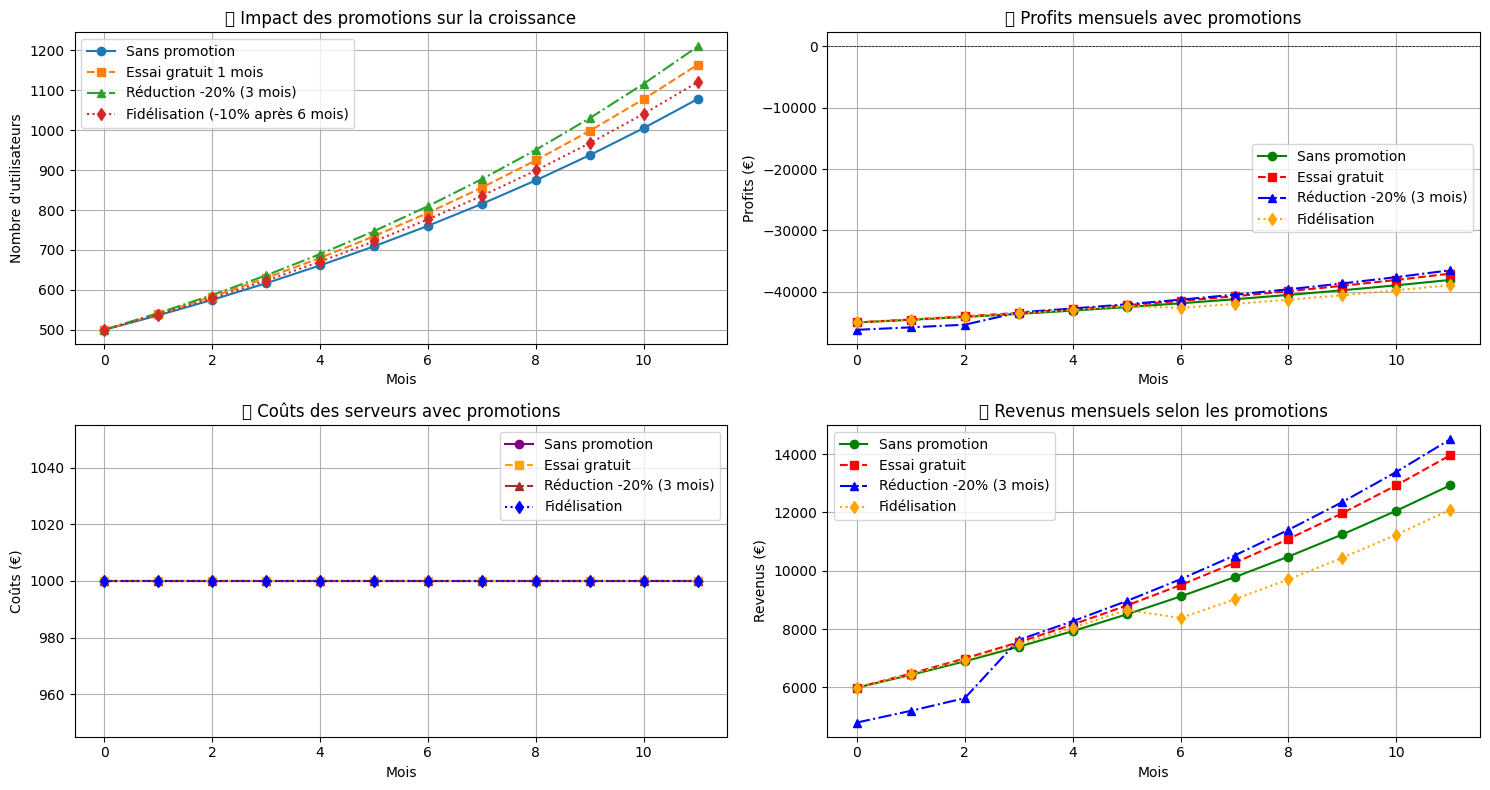

In [12]:
# Red√©finition des param√®tres pour l‚Äôanalyse des promotions
promo_mois_gratuit = 1  # 1er mois offert
promo_reduction_temp = 3  # 3 mois √† -20%
promo_fidelite = 6  # R√©duction de fid√©lit√© apr√®s 6 mois

# Prix avec promotions
prix_base = 11.99
prix_reduction_temp = prix_base * 0.8  # -20% pendant 3 mois
prix_fidelite = prix_base * 0.9  # -10% apr√®s 6 mois

# Mod√®les de croissance logistique
t = np.arange(0, 12, 1)

# Sc√©narios de croissance avec promotions
users_base = logistic_growth(t, P0, K, r)  # Sans promotion
users_promo_gratuit = logistic_growth(t, P0, K, r * 1.1)  # Boost d‚Äôacquisition avec essai gratuit
users_promo_temp = logistic_growth(t, P0, K, r * 1.15)  # Boost court-terme avec r√©duction de prix
users_promo_fidelite = logistic_growth(t, P0, K, r * 1.05)  # Croissance plus stable avec fid√©lisation

# Revenus mensuels
revenus_base = users_base * prix_base
revenus_promo_gratuit = users_promo_gratuit * prix_base
revenus_promo_temp = np.where(t < promo_reduction_temp, users_promo_temp * prix_reduction_temp, users_promo_temp * prix_base)
revenus_promo_fidelite = np.where(t < promo_fidelite, users_promo_fidelite * prix_base, users_promo_fidelite * prix_fidelite)

# Co√ªts serveurs
serveurs_base = np.ceil(users_base / max_users_per_server) * cost_per_server
serveurs_promo_gratuit = np.ceil(users_promo_gratuit / max_users_per_server) * cost_per_server
serveurs_promo_temp = np.ceil(users_promo_temp / max_users_per_server) * cost_per_server
serveurs_promo_fidelite = np.ceil(users_promo_fidelite / max_users_per_server) * cost_per_server

# Profits mensuels
profits_base = revenus_base - serveurs_base - marketing_budget
profits_promo_gratuit = revenus_promo_gratuit - serveurs_promo_gratuit - marketing_budget
profits_promo_temp = revenus_promo_temp - serveurs_promo_temp - marketing_budget
profits_promo_fidelite = revenus_promo_fidelite - serveurs_promo_fidelite - marketing_budget

# Cr√©ation des visualisations
plt.figure(figsize=(15, 8))

# Courbe de croissance des utilisateurs
plt.subplot(2, 2, 1)
plt.plot(t, users_base, label="Sans promotion", linestyle="-", marker="o")
plt.plot(t, users_promo_gratuit, label="Essai gratuit 1 mois", linestyle="--", marker="s")
plt.plot(t, users_promo_temp, label="R√©duction -20% (3 mois)", linestyle="-.", marker="^")
plt.plot(t, users_promo_fidelite, label="Fid√©lisation (-10% apr√®s 6 mois)", linestyle=":", marker="d")
plt.xlabel("Mois")
plt.ylabel("Nombre d'utilisateurs")
plt.title("üìà Impact des promotions sur la croissance")
plt.legend()
plt.grid(True)

# Profits mensuels
plt.subplot(2, 2, 2)
plt.plot(t, profits_base, label="Sans promotion", linestyle="-", marker="o", color="g")
plt.plot(t, profits_promo_gratuit, label="Essai gratuit", linestyle="--", marker="s", color="r")
plt.plot(t, profits_promo_temp, label="R√©duction -20% (3 mois)", linestyle="-.", marker="^", color="b")
plt.plot(t, profits_promo_fidelite, label="Fid√©lisation", linestyle=":", marker="d", color="orange")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("Mois")
plt.ylabel("Profits (‚Ç¨)")
plt.title("üí∞ Profits mensuels avec promotions")
plt.legend()
plt.grid(True)

# Co√ªts serveurs
plt.subplot(2, 2, 3)
plt.plot(t, serveurs_base, label="Sans promotion", linestyle="-", marker="o", color="purple")
plt.plot(t, serveurs_promo_gratuit, label="Essai gratuit", linestyle="--", marker="s", color="orange")
plt.plot(t, serveurs_promo_temp, label="R√©duction -20% (3 mois)", linestyle="-.", marker="^", color="brown")
plt.plot(t, serveurs_promo_fidelite, label="Fid√©lisation", linestyle=":", marker="d", color="blue")
plt.xlabel("Mois")
plt.ylabel("Co√ªts (‚Ç¨)")
plt.title("üí∏ Co√ªts des serveurs avec promotions")
plt.legend()
plt.grid(True)

# Revenus mensuels
plt.subplot(2, 2, 4)
plt.plot(t, revenus_base, label="Sans promotion", linestyle="-", marker="o", color="g")
plt.plot(t, revenus_promo_gratuit, label="Essai gratuit", linestyle="--", marker="s", color="r")
plt.plot(t, revenus_promo_temp, label="R√©duction -20% (3 mois)", linestyle="-.", marker="^", color="b")
plt.plot(t, revenus_promo_fidelite, label="Fid√©lisation", linestyle=":", marker="d", color="orange")
plt.xlabel("Mois")
plt.ylabel("Revenus (‚Ç¨)")
plt.title("üìä Revenus mensuels selon les promotions")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
